<h2>PS1 Worksheet - Data Mining</h2>

Q1) Without Using Inbuilt Functions - Ungrouped Data

In [2]:
def calculate_mean(data):
    if not data:
        return None
    
    total=0

    for value in data:
        total+=value
    
    return total/len(data)


def calculate_median(data):
    if not data:
        return None

    data.sort()
    n = len(data)

    middle_index = n//2

    if middle_index%2==1:
        return data[middle_index]
    else:
        return (data[middle_index-1]+data[middle_index])/2


def calculate_mode(data):

    if not data:
        return None
    
    hash_map = {}

    for value in data:
        if value not in hash_map.keys():
            hash_map[value]=1
        else:
            hash_map[value]+=1
    
    max_freq=0

    for k,v in hash_map.items():
        if v > max_freq:
            max_freq=v
    
    if max_freq == 1:
        return None
    
    # Find all values with maximum frequency
    modes = []
    for value, freq in hash_map.items():
        if freq == max_freq:
            modes.append(value)
    
    # If multiple modes exist, return all of them
    return modes if len(modes) > 1 else modes[0]



def display_results(data):

    """Display the dataset and all calculated statistics."""
    print(f"Dataset: {data}")
    print(f"Sorted dataset: {sorted(data)}")
    print("-" * 40)
    
    mean_value = calculate_mean(data)
    median_value = calculate_median(data)
    mode_value = calculate_mode(data)
    
    print(f"Mean: {mean_value:.2f}" if mean_value is not None else "Mean: N/A")
    print(f"Median: {median_value:.2f}" if median_value is not None else "Median: N/A")
    
    if mode_value is None:
        print("Mode: No mode (all values are unique)")
    elif isinstance(mode_value, list):
        print(f"Mode(s): {', '.join(map(str, mode_value))}")
    else:
        print(f"Mode: {mode_value}")
    print("-" * 40)

def main():
    print("STATISTICAL MEASURES CALCULATOR")
    print("=" * 40)  
    print("\n" + "=" * 40)
    print("CUSTOM DATASET")
    print("=" * 40)
    
    try:
        user_input = input("Enter numbers separated by spaces: ")
        if user_input.strip():
            user_data = [float(x) for x in user_input.split()]
            display_results(user_data)
        else:
            print("No data entered. Using default dataset.")
            default_data = [6, 2, 8, 4, 6, 2, 6, 9, 2]
            display_results(default_data)
    except ValueError:
        print("Invalid input! Please enter numbers only.")


if __name__ == "__main__":
    main()

STATISTICAL MEASURES CALCULATOR

CUSTOM DATASET
Dataset: [4.0, 5.0, 5.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 45.0, 5.0]
Sorted dataset: [1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 45.0]
----------------------------------------
Mean: 6.82
Median: 3.00
Mode(s): 2.0, 5.0
----------------------------------------


Q2) Without Using Inbuilt Functions - Grouped Data

In [3]:
def calculate_mean_grouped_data(class_intervals, freqs):
    midpoints = []
    total_fx = 0
    total_f = 0
    
    for i in range(len(class_intervals)):
        midpoint = (class_intervals[i][0] + class_intervals[i][1]) / 2
        midpoints.append(midpoint)
        
        total_fx += freqs[i] * midpoint
        total_f += freqs[i]
    
    return total_fx / total_f if total_f != 0 else 0


def calculate_median_grouped_data(class_intervals, freqs):
    n = sum(freqs)
    
    # median class (where cumulative frequency >= n/2)
    cumulative_freq = 0
    median_class_index = 0
    
    for i in range(len(freqs)):
        cumulative_freq += freqs[i]
        if cumulative_freq >= n/2:
            median_class_index = i
            break
    
    L = class_intervals[median_class_index][0]  # Lower class boundary
    B = cumulative_freq - freqs[median_class_index]  # Cumulative freq before median class
    G = freqs[median_class_index]  # Frequency of median class
    width = class_intervals[median_class_index][1] - class_intervals[median_class_index][0]
    
    # median formula: L + ((n/2 - B)/G) * width
    return L + ((n/2 - B) / G) * width


def calculate_mode_grouped_data(class_intervals, freqs):
    # (class with highest frequency)
    max_freq_index = 0
    max_freq = freqs[0]
    
    for i in range(1, len(freqs)):
        if freqs[i] > max_freq:
            max_freq = freqs[i]
            max_freq_index = i
    
    L = class_intervals[max_freq_index][0]  # Lower class boundary
    fm = freqs[max_freq_index]  # Frequency of modal class
    
    # Get fm-1 (frequency of previous class) or 0 if first class
    fm_1 = freqs[max_freq_index - 1] if max_freq_index > 0 else 0
    
    # Get fm+1 (frequency of next class) or 0 if last class
    fm_1 = freqs[max_freq_index + 1] if max_freq_index < len(freqs) - 1 else 0
    
    width = class_intervals[max_freq_index][1] - class_intervals[max_freq_index][0]
    
    # Apply mode formula: L + ((fm - fm-1) / ((fm - fm-1) + (fm - fm+1))) * width
    numerator = fm - fm_1
    denominator = (fm - fm_1) + (fm - fm_1)
    
    return L + (numerator / denominator) * width if denominator != 0 else L


def main():
    class_intervals = []
    freqs = []

    # Input class intervals and frequencies
    n = int(input("Enter number of class intervals: "))
    
    for i in range(n):
        print(f"\nClass Interval {i+1}:")
        lower = float(input("  Enter lower limit: "))
        upper = float(input("  Enter upper limit: "))
        freq = int(input("  Enter frequency: "))
        
        class_intervals.append((lower, upper))
        freqs.append(freq)
    
    mean = calculate_mean_grouped_data(class_intervals, freqs)
    median = calculate_median_grouped_data(class_intervals, freqs)
    mode = calculate_mode_grouped_data(class_intervals, freqs)

    print(f"\nMean for the grouped data is {mean:.2f}")
    print(f"Median for the grouped data is {median:.2f}")
    print(f"Mode for the grouped data is {mode:.2f}")


if __name__ == "__main__":
    main()


Class Interval 1:

Class Interval 2:

Mean for the grouped data is 13.33
Median for the grouped data is 14.00
Mode for the grouped data is 15.00


Q3)With the following data values and calculate mean and standard deviation for each group separately using the given formula and analyze the results.

In [4]:
import math

group1 = [10, 15, 17, 25, 14, 76, 89, 190, 50]
group2 = [18, 28, 5, 10, 28, 97, 156, 89, 55]
group3 = [65, 15, 48, 55, 20, 67, 187, 28, 1]

def mean(data):
    return sum(data)/len(data)

def std_dev(data):
    m = mean(data)
    return math.sqrt(sum((x-m)**2 for x in data)/len(data))

print("Group\tMean\t\tStd Dev")
print("-"*40)
for i, g in enumerate([group1, group2, group3], 1):
    print(f"Group {i}\t{mean(g):.2f}\t\t{std_dev(g):.2f}")

Group	Mean		Std Dev
----------------------------------------
Group 1	54.00		55.27
Group 2	54.00		47.68
Group 3	54.00		51.83


Q4)Create a file with 4 attributes (columns) each with 10, 25, 30 and 40 data values respectively. Write a program to calculate standard deviation for each attribute and observe the results by drawing a bell curve.

Attr 1 std: 10.25
Attr 2 std: 10.34
Attr 3 std: 8.10
Attr 4 std: 11.55


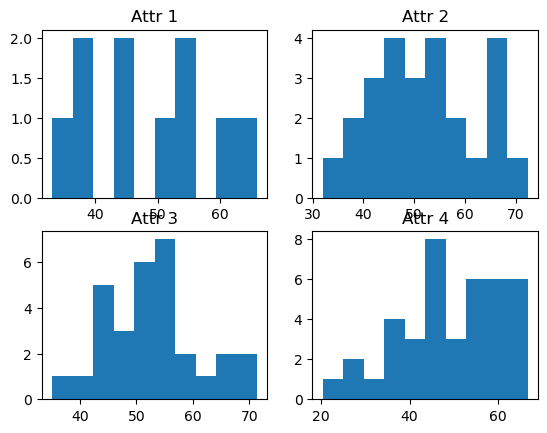

In [18]:
import numpy as np
import matplotlib.pyplot as plt

data = [np.random.normal(50,10,n) for n in [10,25,30,40]]
stds = [d.std() for d in data ]

for i, std in enumerate(stds):
    print(f"Attr {i+1} std: {std:.2f}")

# Plot
fig, axes = plt.subplots(2,2)

for i,d in enumerate(data):
    axes[i//2,i%2].hist(d,bins=10)
    axes[i//2, i%2].set_title(f'Attr {i+1}')
plt.show()

5. Assume that there are 4 columns formed out of customers’ age 
of each transaction from 4 transactional data sets. Sort each column
and find all quartiles and draw boxplot and histograms. Minimum 15 rows 
are to be used.


=== Sorted Customer Ages ===
Row 1: 23, 16, 42, 26
Row 2: 26, 16, 43, 27
Row 3: 26, 17, 44, 31
Row 4: 27, 26, 46, 32
Row 5: 27, 30, 46, 33
Row 6: 30, 35, 48, 36
Row 7: 30, 36, 51, 39
Row 8: 30, 36, 53, 39
Row 9: 34, 38, 54, 44
Row 10: 38, 38, 54, 45
Row 11: 39, 39, 57, 50
Row 12: 40, 41, 57, 50
Row 13: 40, 42, 58, 52
Row 14: 42, 44, 58, 52
Row 15: 43, 47, 59, 53

=== Quartiles for Each Dataset ===

Store1:
  Q1 (25th percentile): 27.0
  Q2 (Median): 30.0
  Q3 (75th percentile): 40.0
  IQR: 13.0

Store2:
  Q1 (25th percentile): 26.0
  Q2 (Median): 36.0
  Q3 (75th percentile): 41.0
  IQR: 15.0

Store3:
  Q1 (25th percentile): 46.0
  Q2 (Median): 53.0
  Q3 (75th percentile): 57.0
  IQR: 11.0

Store4:
  Q1 (25th percentile): 32.0
  Q2 (Median): 39.0
  Q3 (75th percentile): 50.0
  IQR: 18.0


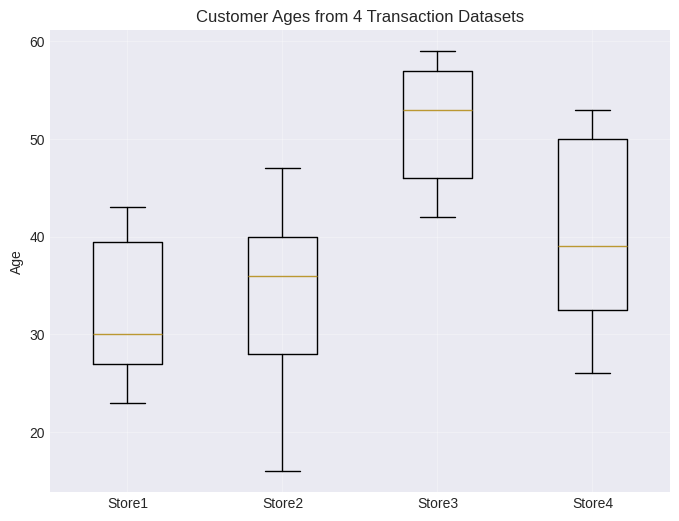

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Create 4 columns of customer ages (minimum 15 rows)
np.random.seed(42)
data = {
    'Store1': np.random.randint(20, 45, 15),       # Young adults
    'Store2': np.random.randint(15, 50, 15),       # Mixed ages
    'Store3': np.random.randint(40, 60, 15),       # Middle-aged
    'Store4': np.random.randint(25, 55, 15)        # Broad range
}

# Sort each column
for col in data:
    data[col] = sorted(data[col])

print("=== Sorted Customer Ages ===")
for i in range(15):
    print(f"Row {i+1}: {data['Store1'][i]}, {data['Store2'][i]}, {data['Store3'][i]}, {data['Store4'][i]}")

print("\n=== Quartiles for Each Dataset ===")

# Function to calculate quartiles
def calculate_quartiles(ages):
    ages = sorted(ages)
    n = len(ages)
    
    # Q2 (Median)
    if n % 2 == 0:
        Q2 = (ages[n//2 - 1] + ages[n//2]) / 2
    else:
        Q2 = ages[n//2]
    
    # Q1 (Lower quartile)
    lower_half = ages[:n//2]
    Q1 = np.median(lower_half)
    
    # Q3 (Upper quartile)
    upper_half = ages[(n+1)//2:]
    Q3 = np.median(upper_half)
    
    IQR = Q3 - Q1  # Interquartile Range
    
    return Q1, Q2, Q3, IQR

# Calculate quartiles for each dataset
for store, ages in data.items():
    Q1, Q2, Q3, IQR = calculate_quartiles(ages)
    print(f"\n{store}:")
    print(f"  Q1 (25th percentile): {Q1:.1f}")
    print(f"  Q2 (Median): {Q2:.1f}")
    print(f"  Q3 (75th percentile): {Q3:.1f}")
    print(f"  IQR: {IQR:.1f}")

# Simple Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([data['Store1'], data['Store2'], data['Store3'], data['Store4']])
plt.title('Customer Ages from 4 Transaction Datasets')
plt.xticks([1, 2, 3, 4], ['Store1', 'Store2', 'Store3', 'Store4'])
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()